In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#test_df = pd.read_csv("./input/test.csv")
train_df = pd.read_csv("./input/train.csv")
#sample_submission_df = pd.read_csv("./input/sample_submission.csv")

## 귀찮으시면, 
# ctrl+f  + 끝 
## 부터 보시면 러닝 돌린거부터 볼 수 있습니다~

## 아래부터 전처리 갑니다.

In [3]:
train_df.keys()

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [4]:
train_df.shape

(26729, 10)

## 전처리

성별 column과 중성화 column 추가

In [6]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

In [7]:
train_df['Sex'] = train_df.SexuponOutcome.apply(get_sex)
train_df['Neutered'] = train_df.SexuponOutcome.apply(get_neutered)

In [8]:
# 이름과 subtype 전처리
train_df['Name'] = train_df['Name'].replace(np.nan, 'Unknown', regex=True)
train_df['OutcomeSubtype'] = train_df['OutcomeSubtype'].replace(np.nan, 'None', regex=True)
train_df['AgeuponOutcome'] = train_df['AgeuponOutcome'].replace(np.nan, '0 days', regex=True)

In [9]:
# AgeuponOutcome -> 일수로 변경
for i in range(0, len(train_df['AgeuponOutcome'])):
    num, unit = (train_df['AgeuponOutcome'][i]).split(' ')
    if unit == 'year' or unit == 'years':
        train_df['AgeuponOutcome'][i] = int(num) * 365
    elif unit == 'month' or unit == 'months':
        train_df['AgeuponOutcome'][i] = int(num) * 30
    elif unit == 'week' or unit == 'weeks':
        train_df['AgeuponOutcome'][i] = int(num) * 7
    elif unit == 'day' or unit == 'days':
        train_df['AgeuponOutcome'][i] = int(num)

In [10]:
# Name 유무 변수 생성

def is_name(x):
    x = str(x)
    if x.find('Unknow') >= 0: return 0
    else: return 1

train_df['isName'] = train_df.Name.apply(is_name)

In [11]:
# number of color 색상의 갯수, 0은 한색, 1은 두색이상
def get_num(x):
    x = str(x)
    if x.find('/') >= 0: return 1
    else: return 0

train_df['numCol'] = train_df.Color.apply(get_num)

In [12]:
train_df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,isName,numCol
26724,A702446,Unknown,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,30,Domestic Shorthair Mix,Brown Tabby/White,male,intact,0,1
26725,A718934,Unknown,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,90,Domestic Shorthair Mix,Brown Tabby,female,neutered,0,0
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,None,Dog,Neutered Male,1460,Old English Bulldog Mix,White/Tan,male,neutered,1,1
26727,A677478,Unknown,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,28,Domestic Shorthair Mix,Black,male,intact,0,0
26728,A706629,Unknown,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,365,Domestic Shorthair Mix,Brown Tabby/White,male,intact,0,1


In [13]:
# Color 단순화 1단계 '/'제거
from pandas import Series

bymain = []

for i in train_df['Color']:
    i = str(i)
    if i.find('/') >= 0:
        f, s = i.split('/')
        bymain.append(f)
    else:
        bymain.append(i)

train_df['newColor'] = Series(bymain)

In [14]:
train_df['newColor'].value_counts()

Black                6422
White                3344
Brown Tabby          2592
Brown                1951
Tan                  1674
Orange Tabby         1299
Blue                 1199
Tricolor              800
Red                   779
Brown Brindle         699
Blue Tabby            678
Tortie                580
Calico                552
Chocolate             448
Torbie                398
Sable                 324
Cream Tabby           277
Buff                  267
Yellow                230
Gray                  227
Cream                 221
Fawn                  209
Lynx Point            183
Blue Merle            165
Seal Point            158
Black Brindle          99
Flame Point            85
Gold                   77
Brown Merle            72
Black Smoke            62
Black Tabby            61
Silver                 53
Red Merle              52
Gray Tabby             51
Blue Tick              44
Orange                 43
Silver Tabby           41
Red Tick               40
Lilac Point 

In [15]:
def get_mainC(x):
    x = str(x)
    if x.find('Black') >= 0: return 'dark'
    if x.find('White') >= 0: return 'light'
    if x.find('Brown') >= 0: return 'dark'
    if x.find('Orange') >= 0: return 'light'
    if x.find('Blue') >= 0: return 'medium'
    if x.find('Red') >= 0: return 'medium'
    
    if x.find('Tan') >= 0: return 'medium'
    if x.find('Tortie') >= 0: return 'dark'
    if x.find('Calico') >= 0: return 'medium'
    if x.find('Torbie') >= 0: return 'medium'
    if x.find('Buff') >= 0: return 'light'
    if x.find('Sable') >= 0: return 'dark'
    if x.find('Cream') >= 0: return 'light'
    if x.find('Yellow') >= 0: return 'light'
    if x.find('Lynx') >= 0: return 'light'
    if x.find('Chocolate') >= 0: return 'dark'
    if x.find('Gray') >= 0: return 'dark'
    if x.find('Liver') >= 0: return 'dark'
    if x.find('Flame') >= 0: return 'light'
    if x.find('Agouti') >= 0: return 'dark'
    if x.find('Pink') >= 0: return 'light'
    if x.find('Ruddy') >= 0: return 'medium'
    if x.find('Gold') >= 0: return 'light'
    if x.find('Silver') >= 0: return 'light'
    if x.find('Lilac') >= 0: return 'light'
    if x.find('Seal') >= 0: return 'medium'
    if x.find('Fawn') >= 0: return 'light'
    if x.find('Apricot') >= 0: return 'light'
    else: return x

train_df['newColor2'] = train_df.newColor.apply(get_mainC)

In [16]:
train_df['newColor2'].value_counts()

dark        13670
light        6429
medium       5830
Tricolor      800
Name: newColor2, dtype: int64

In [17]:
train_df.keys()

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color',
       'Sex', 'Neutered', 'isName', 'numCol', 'newColor', 'newColor2'],
      dtype='object')

In [18]:
train_df.DateTime.head(10)

0    2014-02-12 18:22:00
1    2013-10-13 12:44:00
2    2015-01-31 12:28:00
3    2014-07-11 19:09:00
4    2013-11-15 12:52:00
5    2014-04-25 13:04:00
6    2015-03-28 13:11:00
7    2015-04-30 17:02:00
8    2014-02-04 17:17:00
9    2014-05-03 07:48:00
Name: DateTime, dtype: object

In [19]:
bydate = []
bytime = []

for i in train_df['DateTime']:
    if i.find(' ') >= 0:
        f, s = i.split(' ')
        bydate.append(f)
        bytime.append(s)
    else:
        pass

train_df['date'] = Series(bydate)
train_df['time'] = Series(bytime)

In [20]:
byyear = []
bymonth = []
byday = []

for i in train_df['date']:
    if i.find('-') >= 0:
        f, s, d = i.split('-')
        byyear.append(f)
        bymonth.append(s)
        byday.append(d)
    else:
        pass

train_df['year'] = Series(byyear)
train_df['month'] = Series(bymonth)
train_df['day'] = Series(byday)

In [21]:
byhour = []
byminu = []
bysec = []

for i in train_df['time']:
    if i.find(':') >= 0:
        f, s, d = i.split(':')
        byhour.append(f)
        byminu.append(s)
        bysec.append(d)
    else:
        pass

train_df['hour'] = Series(byhour)
train_df['minute'] = Series(byminu)
train_df['sec'] = Series(bysec)

In [22]:
# useing variables
uvar = ['OutcomeType', 'AnimalType', 'Sex', 'Neutered', 'AgeuponOutcome', 'isName', 'numCol', 'newColor2', 'year', 'month', 'day', 'hour', 'minute', 'sec']
uvar_c = ['AnimalType', 'Sex', 'Neutered', 'AgeuponOutcome', 'isName', 'numCol', 'newColor2', 'year', 'month', 'day', 'hour', 'minute', 'sec']

# 'newColor2'

In [23]:
train_df[uvar].keys()

Index(['OutcomeType', 'AnimalType', 'Sex', 'Neutered', 'AgeuponOutcome',
       'isName', 'numCol', 'newColor2', 'year', 'month', 'day', 'hour',
       'minute', 'sec'],
      dtype='object')

In [24]:
df_uv = train_df[uvar]
df_uv.target = df_uv.iloc[:,0]
df_uv.data = df_uv.iloc[:,1:]

In [25]:
# df_uv.data   더미화

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#df_uv.data['OutcomeSubtype'] = encoder.fit_transform(df_uv.data['OutcomeSubtype'])

#df_uv.data['AnimalType'] = encoder.fit_transform(df_uv.data['AnimalType'])
df_uv.data['Sex'] = encoder.fit_transform(df_uv.data['Sex'])
df_uv.data['Neutered'] = encoder.fit_transform(df_uv.data['Neutered'])
df_uv.data['numCol'] = encoder.fit_transform(df_uv.data['numCol'])
df_uv.data['newColor2'] = encoder.fit_transform(df_uv.data['newColor2'])

#df_uv.data['newColor2'] = encoder.fit_transform(df_uv.data['newColor2'])

In [26]:
df_uv.data.keys()

Index(['AnimalType', 'Sex', 'Neutered', 'AgeuponOutcome', 'isName', 'numCol',
       'newColor2', 'year', 'month', 'day', 'hour', 'minute', 'sec'],
      dtype='object')

In [27]:
df_uv.target.keys()

RangeIndex(start=0, stop=26729, step=1)

In [28]:
df_uv.target.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [29]:
dog = df_uv[df_uv['AnimalType'] == 'Dog']
cat = df_uv[df_uv['AnimalType'] == 'Cat']

dog.target = dog.iloc[:,0]
dog.data = dog.iloc[:,1:]

cat.target = cat.iloc[:,0]
cat.data = cat.iloc[:,1:]

In [30]:
# 더미화

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#df_uv.data['OutcomeSubtype'] = encoder.fit_transform(df_uv.data['OutcomeSubtype'])

dog.data['AnimalType'] = encoder.fit_transform(dog.data['AnimalType'])
dog.data['Sex'] = encoder.fit_transform(dog.data['Sex'])
dog.data['Neutered'] = encoder.fit_transform(dog.data['Neutered'])
dog.data['numCol'] = encoder.fit_transform(dog.data['numCol'])
dog.data['newColor2'] = encoder.fit_transform(dog.data['newColor2'])

cat.data['AnimalType'] = encoder.fit_transform(cat.data['AnimalType'])
cat.data['Sex'] = encoder.fit_transform(cat.data['Sex'])
cat.data['Neutered'] = encoder.fit_transform(cat.data['Neutered'])
cat.data['numCol'] = encoder.fit_transform(cat.data['numCol'])
cat.data['newColor2'] = encoder.fit_transform(cat.data['newColor2'])

#df_uv.data['newColor2'] = encoder.fit_transform(df_uv.data['newColor2'])

# 전처리 끝

### df_uv.target & df_uv.data 
### dog.target & .data
### cat.target & .data

- df_uv.target  ->  ['OutcomeType']
- df_uv.data  ->  ['AnimalType', 'Sex', 'Neutered', 'AgeuponOutcome', 'isName', 'newColor2']

- .target -> ['OutcomeType']
- .data -> ['AnimalType', 'Sex', 'Neutered', 'AgeuponOutcome', 'isName']

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

## DecisionTree DOG

In [32]:
clf = clf.fit(dog.data, dog.target)

In [33]:
clf.score(dog.data, dog.target)

0.57576146200705358

In [34]:
from IPython.display import Image
from sklearn import tree
import pydotplus 
import graphviz

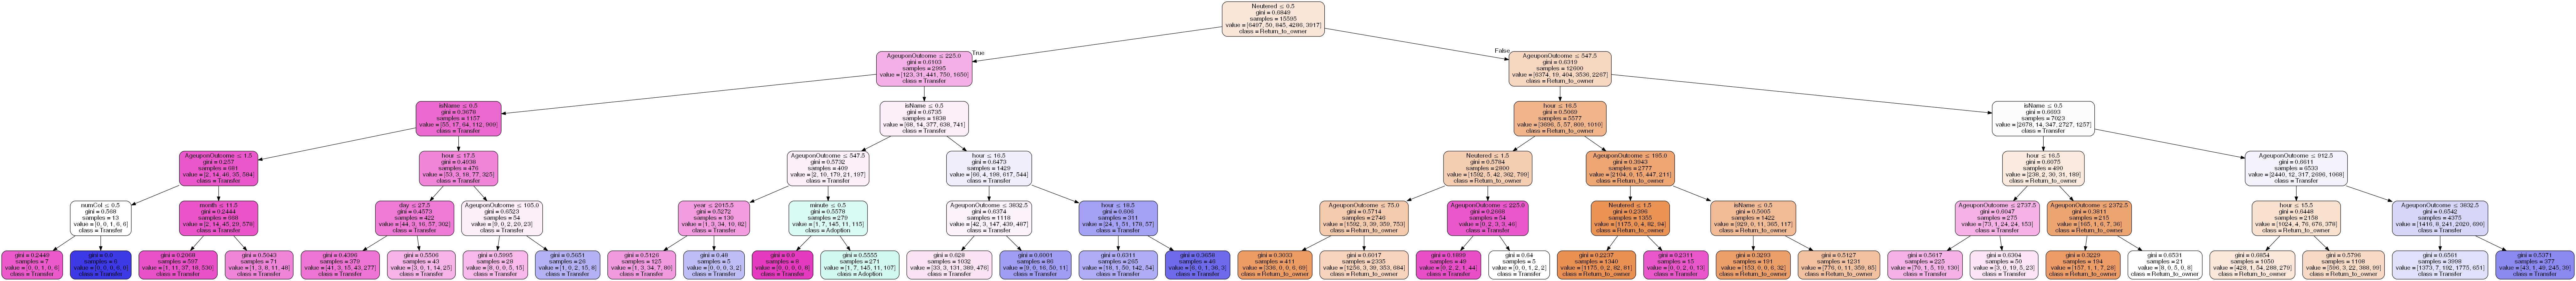

In [35]:
dot_data = tree.export_graphviz(clf, out_file=None,
                        feature_names=uvar_c,
                        class_names=train_df.OutcomeType,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## DecisionTree CAT

In [36]:
clf = clf.fit(cat.data, cat.target)

In [37]:
clf.score(cat.data, cat.target)

0.77609125202083706

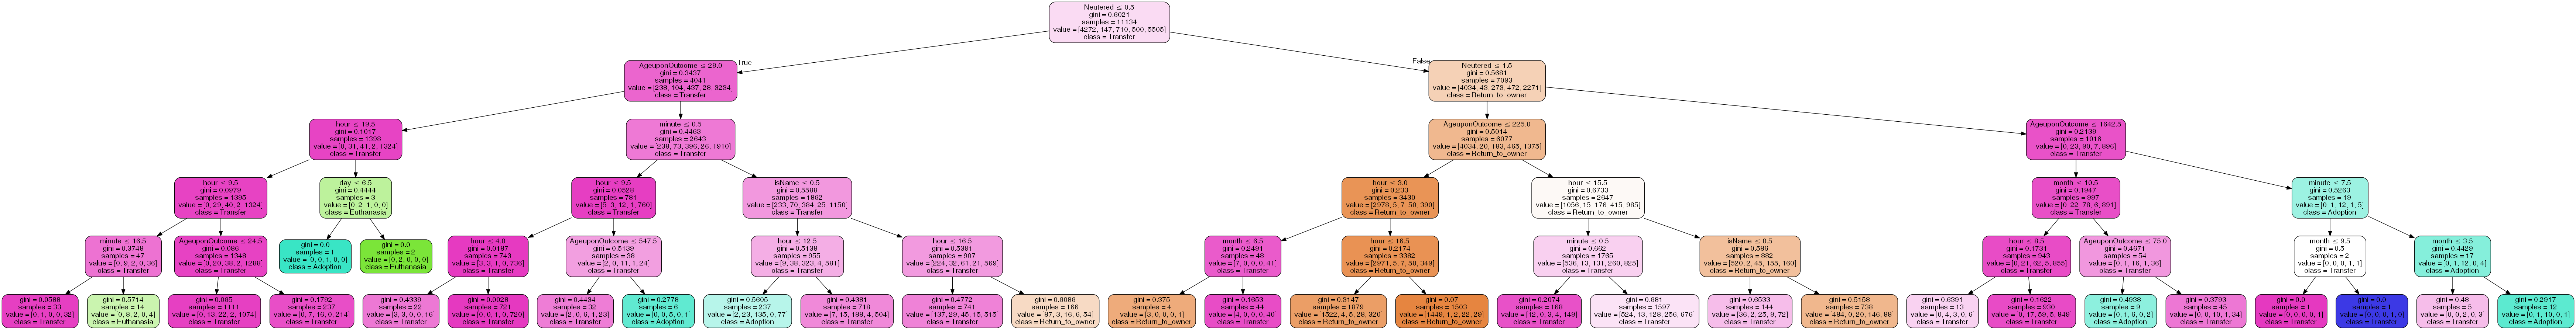

In [38]:
dot_data = tree.export_graphviz(clf, out_file=None,
                        feature_names=uvar_c,
                        class_names=train_df.OutcomeType,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [39]:
# Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier

In [41]:
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

## Bagging DOG

In [42]:
bagging.fit(dog.data, dog.target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [43]:
bagging.score(dog.data, dog.target)

0.78916319333119589

## Bagging Cat

In [44]:
bagging.fit(cat.data, cat.target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [45]:
bagging.score(cat.data, cat.target)

0.88692293874618289

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [48]:
bagging.fit(dog.data, dog.target)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [49]:
bagging.score(dog.data, dog.target)

0.65309394036550172

In [50]:
bagging.fit(cat.data, cat.target)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [51]:
bagging.score(cat.data, cat.target)

0.80662834560804741

In [52]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators=10)

In [54]:
rfc.fit(dog.data, dog.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [55]:
rfc.score(dog.data, dog.target)

0.9823661429945495

In [56]:
rfc.fit(cat.data, cat.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
rfc.score(cat.data, cat.target)

0.99101850188611462

In [58]:
rfc.predict(cat.data)

array(['Euthanasia', 'Transfer', 'Transfer', ..., 'Transfer', 'Transfer',
       'Transfer'], dtype=object)

In [59]:
# feature importance
rfc.feature_importances_

array([ 0.        ,  0.07357876,  0.19636881,  0.16652597,  0.04522302,
        0.01708973,  0.02793769,  0.03347435,  0.06984541,  0.10379515,
        0.12995408,  0.13620703,  0.        ])

In [60]:
pd.Series(rfc.feature_importances_, index=uvar_c)

AnimalType        0.000000
Sex               0.073579
Neutered          0.196369
AgeuponOutcome    0.166526
isName            0.045223
numCol            0.017090
newColor2         0.027938
year              0.033474
month             0.069845
day               0.103795
hour              0.129954
minute            0.136207
sec               0.000000
dtype: float64

In [161]:
# Boosting

In [178]:
# target 더미화
dog.target = encoder.fit_transform(dog.target)
cat.target = encoder.fit_transform(cat.target)

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [164]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=300, random_state=1)

In [165]:
regr_1.fit(dog.data, dog.target)
regr_2.fit(dog.data, dog.target)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=1)

In [166]:
print(regr_1.score(dog.data, dog.target))
print(regr_2.score(dog.data, dog.target))

0.259329987863
0.215132027789


In [167]:
regr_1.fit(cat.data, cat.target)
regr_2.fit(cat.data, cat.target)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=1)

In [168]:
print(regr_1.score(cat.data, cat.target))
print(regr_2.score(cat.data, cat.target))

0.571676583158
0.534191298994


## boosting 잘 한건 지 모르겟음.

## 시간 오래걸림... 주의 요함... (근데 성적은 고만고만...)

In [ ]:
# SVM

In [100]:
from sklearn import svm
svmex = svm.SVC()
svmex.fit(dog.data, dog.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
svmex.score(dog.data, dog.target)

0.57287592176979796

In [102]:
svmex.fit(cat.data, cat.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
svmex.score(cat.data, cat.target)

0.762619004850009